In [15]:
import numpy as np

#Sebastian Raschka _ python machine learning code.
class Perceptron():
    def __init__(self, thresholds = 0.0 , eta = 0.01, n_iter = 10):
        #thresholds : 임계값 
        #eta : learning rate
        #n_iter : 학습횟수
        
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X ,y):
        # X: training data , y : result data (usually representing large X & small y)
        self.w_ = np.zeros(1+X.shape[1])
        #가중치를 numpy 배열로 정의 
        #X.shape[1] : the numb of training data 
        # ex/ X가 4 x 2 일경우 : X.shape (4.2) X.shape[1] 의 값은 2가 된다.
        # 그럼 self.w_ 는 np.zeros(3)이 될 것이고 numpy 배열 [0.0.0.]이 된다
        
        self.errors_ = []
        #반복 회수에 따라 perceptron의 예측값과 실제 결과값이 다른 오류 회수를 저장하기 위한 변수
        
        for _ in range(self.n_iter): #Using n_iter repeating  designated numb
            errors = 0#초기 오류 횟수를 0으로 잡고
            for xi, target in zip(X,y):
                #트레이닝 데이터 셋 X 와 결과값 y를 하나씩 꺼내서
                #xi와 target에 대입한다
                update = self.eta * (target- self.predict(xi))
                #xi :  input data meaing x1~xn, (x0 == 1)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
            print(self.w_)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    #벡터 x,y의 내적 또는 행렬 x,y의 곲을 리턴
    #즉, training data X 입력값과 그에 따른 가중치를 곱합 총합
    
    
    def predict(self,X):
        return np.where(self.net_input(X) > self.thresholds, 1, -1)
    #즉, 순입력함수 결과깂이 임계값보다 크면 1
    

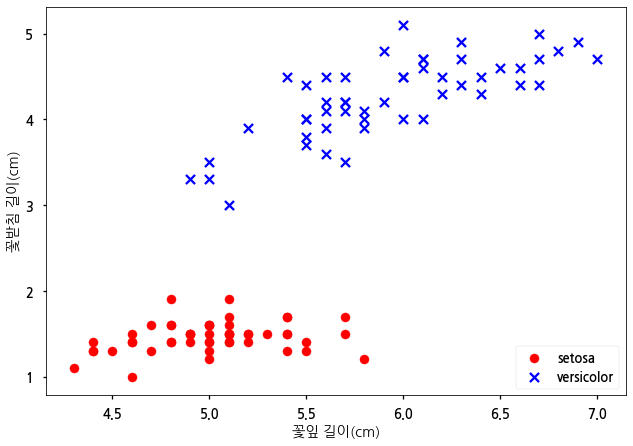

[0.2  1.4  0.94]
[0.   0.8  1.32]
[-0.2  0.2  1.7]
[-0.2   0.32  2.12]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


In [20]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-talk')

krfont = {'family': 'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False
#for using Korean

if __name__ =='__main__':
    style.use('seaborn-talk')
    
    df = pd.read_csv('C:\CodeTemp\iris.data',header=None)
    #pandas는 csv를 DataFrame 객체 형태로 변환해주는 라이브러리다
    #df = pd.read_csv('아이리스 링크도 가능',header=None)
    
    y = df.iloc[0:100, 4].values
    y = np.where(y=='Iris-setosa', -1,1)
    #y는 결과값이다. 
    #DataFrame에서 0~99라인까지 5번째 컬럼의 데이터값을 numpy배열로 리턴받아 y에 대입한다.
    #따라서 아이리스 데이터 파일에서 100개의 데이터를 추출하여 5번째 컬럼의 데이터 값을 numpy 배열로 리턴한다.
    #앞의 5번째 컬럼은 아이리스 품종을 나타내는 문자열 값이라 패스한다.
    #x0는 아이리스 데이터에 있는 값이 아님을 유의하자.
    
    #1~50까지가 setosa고 51~100까지가 versicolor다
    #y의 0~49번 인덱스에 해당값은 -1로 50~99는 1로 된 numpy 배열이 된다.
    
    X = df.iloc[0:100, [0,2]].values
    
    #0~99중 1,3 번째 컬럼 데이터 값을 numpy배열로 리턴받아 X에 대입
    # 1은 꽃받침 길이
    # 3은 꽃잎길이
    # 즉, 꽃받침 길이, 꽃잎길이에 따른 아이리스 품종을 머신러닝으로 학습하는 코드
    
    plt.scatter(X[:50,0], X[:50,1], color='r', marker='o', label='setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor')
    plt.xlabel('꽃잎 길이(cm)')
    plt.ylabel('꽃받침 길이(cm)')
    plt.legend(loc=4)
    plt.show()
    #위 코드는 matploblib으로 산점도를 그리는 코드다
    
    ppn1 = Perceptron(eta=0.1)
    ppn1.fit(X,y)
    print(ppn1.errors_)